In [1]:
import os
from distutils.dir_util import copy_tree
import itertools
import scipy
from scipy import stats
import pandas as pd
import numpy as np
import random
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pytz
from matplotlib.ticker import MultipleLocator, FixedLocator, LogLocator, NullFormatter, ScalarFormatter


In [2]:
gpu_nodes = {
    "r28n1", "r28n2", "r28n3", "r28n4", "r28n5",
    "r29n1", "r29n2", "r29n3", "r29n4", "r29n5",
    "r30n1", "r30n2", "r30n3", "r30n4", "r30n5", "r30n6", "r30n7",
    "r31n1", "r31n2", "r31n3", "r31n4", "r31n5", "r31n6"
    "r32n1", "r32n2", "r32n3", "r32n4", "r32n5", "r32n6", "r32n7",
    "r33n2", "r33n3", "r33n5", "r33n6",
    "r34n1", "r34n2", "r34n3", "r34n4", "r34n5", "r34n6", "r34n7",
    "r35n1", "r35n2", "r35n3", "r35n4", "r35n5",
    "r36n1", "r36n2", "r36n3", "r36n4", "r36n5",
    "r38n1", "r38n2", "r38n3", "r38n4", "r38n5",
}

In [3]:
df = pd.read_parquet("Q:/Downloads/surf-lisa-machine-data-2019-12-29-23-00-00-2020-08-07-21-59-45.tar/surf-lisa-machine-data-2019-12-29-23-00-00-2020-08-07-21-59-45/processed-surf-dataset/node_context_switches_total")

In [4]:
# We noticed some negative numbers in what should be a cumulative number (see https://docs.splunk.com/observability/gdi/prometheus-node/prometheus-node.html)
# We assume these might be node reboots or other events that reset the counter, and thus clip the results to 0.
# We assume positive changes are valid.
df = df.dropna().diff().clip(lower=0)

In [5]:
visualize_top = 15
top_nodes = df.max().sort_values().index[-visualize_top:]

In [8]:
def make_plot(ax, series):
    ax.plot(series, color="lightcoral")
    ax.get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True)) 
    ax.yaxis.get_offset_text().set_visible(False)
    
    def get_converted_xticks(ax):
        """
        :param ax:
        :return list of day and month strings
        """
        return [pd.to_datetime(int(tick.get_text()), utc=True, unit="s").strftime("%d\n%b") for tick in ax.get_xticklabels()]
    
    ax.get_xaxis().set_major_formatter(ScalarFormatter(useMathText=False)) 
    ax.ticklabel_format(axis='x', style='plain')
    ax.xaxis.get_offset_text().set_visible(False)
    
    fig.tight_layout()
    # This call needs to be after the tight_layout call so that the labels have been set!
    ax.set_xticklabels(get_converted_xticks(ax))

In [6]:
plot_df = df
plot_df["dt"] = pd.to_datetime(plot_df.index, utc=True, unit="s")

C:\Users\laurens\AppData\Local\Temp/ipykernel_12788/3758762637.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(get_converted_xticks(ax))


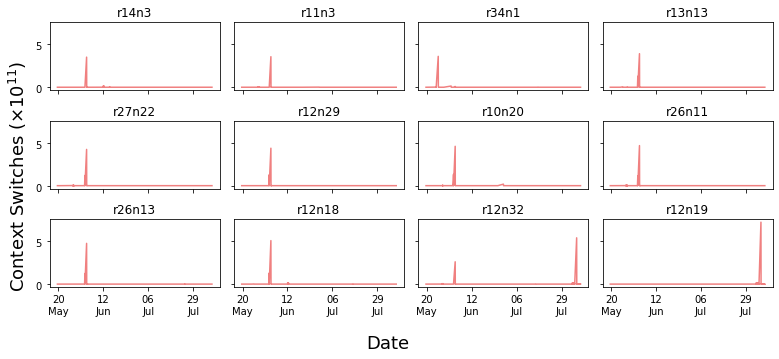

In [13]:
rows = 3
cols = 4
fig, axes = plt.subplots(nrows=rows, ncols=cols, sharex=True, sharey=True, figsize=(11, 5))

for row in range(rows):
    for col in range(cols):
        ax = axes[row, col]
        node = top_nodes[row*cols + col]
        make_plot(ax, plot_df[node])
        ax.set_title(node)

fig.tight_layout()

fig.supxlabel('Date', fontsize=18)
fig.supylabel("Context Switches ({})".format(axes[0, 0].get_yaxis().get_major_formatter().get_offset()), fontsize=18)
fig.tight_layout()
date_time = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
fig.savefig(f"output/context_switches_top_{rows*cols}_nodes_{date_time}.pdf", bbox_inches='tight')

In [23]:
plot_df[top_nodes[:12]].idxmax().sort_values()

r34n1     1590508155
r14n3     1591262055
r11n3     1591262055
r13n13    1591262055
r27n22    1591262055
r12n29    1591262055
r10n20    1591262055
r26n11    1591262055
r26n13    1591262055
r12n18    1591262055
r12n32    1596664800
r12n19    1596664800
dtype: int64